## Problem Statement : Predict Melbourne house price using historic data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

#### Load Housing Price Prediction data from csv file

In [2]:
data = pd.read_csv('./dataset/Melbourne_housing_FULL.csv')

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

Postcode: Postal Code

#### Let's have a look at shape of the dataframe

In [3]:
data.shape

(34857, 21)

#### Let's look at column names in dataset

In [4]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

#### Check if all records have "Price". Filter records with "Price" and take that as training set.

In [5]:
data.Price.count() # Some historic records have missing values in target variable.

27247

In [6]:
data_no_nulls_in_target = data[~ data.Price.isnull() ] ## Eliminated recores with "Price" null

In [7]:
data_no_nulls_in_target.shape

(27247, 21)

In [8]:
from sklearn.model_selection import ShuffleSplit
shuffleSplit = ShuffleSplit(n_splits=1,test_size = 0.2 , random_state=42)
for train_index, test_index in shuffleSplit.split(data_no_nulls_in_target):
    training_set = data_no_nulls_in_target.loc[train_index]
    test_set = data_no_nulls_in_target.loc[test_index]

In [9]:
training_set.shape

(21797, 21)

#### Just to get an idea, let's have a look at first 5 records

In [10]:
training_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
17957,Carnegie,29 Holywood Gr,3.0,h,1370000.0,S,Gary,12/08/2017,10.1,3163.0,...,1.0,2.0,485.0,NaN,NaN,Glen Eira City Council,-37.88553,145.05012,Southern Metropolitan,7822.0
6753,Middle Park,96 Hambleton St,3.0,h,2956000.0,S,Marshall,4/03/2017,4.1,3206.0,...,2.0,0.0,300.0,NaN,NaN,Port Phillip City Council,-37.84770,144.96070,Southern Metropolitan,2019.0
1833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17054,Hughesdale,198 Poath Rd,3.0,h,1250000.0,VB,hockingstuart,27/05/2017,12.3,3166.0,...,1.0,2.0,603.0,NaN,NaN,Monash City Council,-37.90192,145.07560,Southern Metropolitan,3145.0


## Exploratory Data Analysis
###  As part of data analysis we refine the data - below are some common activities we do.

- **Missing : ** Check for missing or incomplete data, impute/fillna with appropriate data
- **Quality : ** Check for duplicates, accuracy, unusual data.
- **Parse : ** Prase existing data and create new fearures. e.g. Extract year and month from date
- **Convert : ** Free text to coded value (LabelEncoder, One-Hot-Encoding or LabelBinarizer)
- **Derive** Derive new feature out of existing featre/fearues e.g. gender from title Mr. Mrs.
- **Calculate** percentages, proportion
- **Remove** Remove redundant or not so useful data
- **Merge** Merge multiple columns e.g. first and surname for full name
- **Aggregate** e.g. rollup by year, cluster by area
- **Filter** e.g. exclude based on location
- **Sample** e.g. extract a representative data
- **Summary** Pandas describe function or stats like mean

#### Check if any columns have got nulls

In [11]:
training_set.isnull().any()

Suburb           True
Address          True
Rooms            True
Type             True
Price            True
Method           True
SellerG          True
Date             True
Distance         True
Postcode         True
Bedroom2         True
Bathroom         True
Car              True
Landsize         True
BuildingArea     True
YearBuilt        True
CouncilArea      True
Lattitude        True
Longtitude       True
Regionname       True
Propertycount    True
dtype: bool

#### Look at distinct data types in our data

In [12]:
training_set.dtypes.value_counts()

float64    13
object      8
dtype: int64

#### Check if numerical columns have got nulls. 
  * If we see below, most of the numerical columns have got nulls. 
  * Some features like "Postcode", "Lattitude", and "Longtitude" are related features.  These three reatures are related to "Address". I am thinking if we can use "Postcode" feature to represent all there.

In [13]:
training_set.select_dtypes(['float64','int64']).isnull().any()

Rooms            True
Price            True
Distance         True
Postcode         True
Bedroom2         True
Bathroom         True
Car              True
Landsize         True
BuildingArea     True
YearBuilt        True
Lattitude        True
Longtitude       True
Propertycount    True
dtype: bool

#### Check if categorical/text columns have got nulls. 
  * "CouncilArea", "Regionname" have got nulls. These two reatures are related to "Address". I am thinking if we can use "Postcode" feature to represent all there.

In [14]:
training_set.select_dtypes(['object']).isnull().any()

Suburb         True
Address        True
Type           True
Method         True
SellerG        True
Date           True
CouncilArea    True
Regionname     True
dtype: bool

### Big Decision (importance of Statistical Data Analysis - Bivariate data analysis):
  #### Should we remove "CouncilArea", "Regionname", "Lattitude", and "Longtitude" features and have "Postcode"(after fixing nulls) as it may represent the address - in other workds, is "Postcode" an important feature in predicting "Price" ?
    * Before we make a decision we have to fix some problems with "Postcode" column by do some statistical data analysis

#### Step 1: Check how many records with "Postcode" nulls.
#### Step 2: Check "Postcode" equal for all the addresses in same "Suburb" (a column with no-nulls). If so, we can write some logic to populate "Postcode" based on "Suburb".
#### Step 3: Is postal code an important feature to predict "Price" ?.

In [15]:
df_null_postcodes = training_set[training_set['Postcode'].isnull()]

In [16]:
df_null_postcodes.shape

(4772, 21)

#### Check if any row with non-null "Suburb" is present for row in "Postcode"

In [17]:
df_null_postcodes[~ df_null_postcodes['Suburb'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


#### Check if distict "Suburb" have distict "Postcode" 

In [18]:
df_non_null_postcodes = training_set[~ training_set['Postcode'].isnull()]

In [19]:
df_non_null_postcodes.groupby(['Suburb','Postcode']).size().shape

(329,)

In [20]:
diction = dict(df_non_null_postcodes.groupby(['Suburb','Postcode']).size().index)

In [21]:
len(diction)

329

#### * There both "Postcode", "Suburb" are null for all records hence remove the records.

In [22]:
training_set[training_set['Postcode'].isnull()].index

Int64Index([ 1833, 19795, 22210,  3233, 23980,  1026,  1174, 12291,  1197,
            19854,
            ...
              189, 26382, 25551,  6396, 19769, 17568,  5311, 23333,  6265,
            15795],
           dtype='int64', length=4772)

In [23]:
training_set = training_set.drop(training_set[training_set['Postcode'].isnull()].index)

#### Is Postalcode an important feature in predicting Price ?

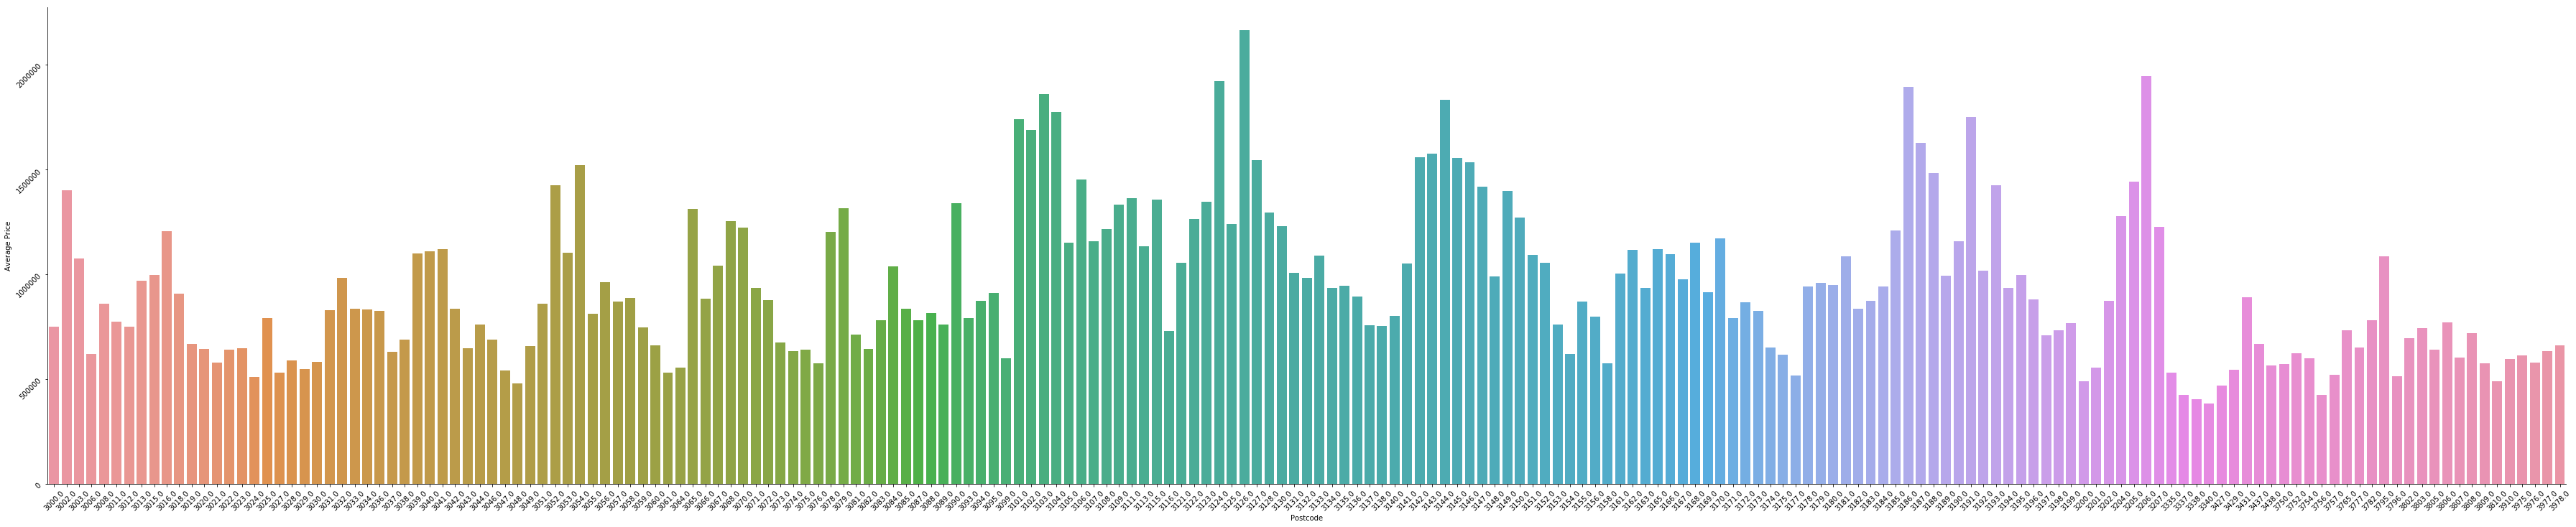

In [24]:
gr = sns.factorplot(data=training_set, x="Postcode", y="Price", kind="bar", ci=None,size=10, aspect=5)
plt.xlabel("Postcode")
plt.ylabel("Average Price")
l1 = gr.set_yticklabels(rotation = 45)
l2 = gr.set_xticklabels(rotation = 45)

#### Drop  "CouncilArea", "Regionname", "Lattitude", "Suburb", "Longtitude"

In [25]:
training_set.drop(["Address", "CouncilArea", "Regionname", "Lattitude", "Suburb", "Longtitude"], axis=1, inplace=True)

In [26]:
training_set.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance',
       'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'Propertycount'],
      dtype='object')

In [27]:
training_set.head()

,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
17957,3.0,h,1370000.0,S,Gary,12/08/2017,10.1,3163.0,3.0,1.0,2.0,485.0,NaN,NaN,7822.0
6753,3.0,h,2956000.0,S,Marshall,4/03/2017,4.1,3206.0,3.0,2.0,0.0,300.0,NaN,NaN,2019.0
17054,3.0,h,1250000.0,VB,hockingstuart,27/05/2017,12.3,3166.0,3.0,1.0,2.0,603.0,NaN,NaN,3145.0
19340,2.0,u,682000.0,S,Jellis,29/07/2017,7.7,3124.0,2.0,1.0,1.0,1106.0,NaN,1970.0,8920.0
14883,3.0,h,740000.0,S,Ray,3/06/2017,17.9,3192.0,NaN,NaN,NaN,NaN,NaN,NaN,9758.0


In [28]:
training_set.select_dtypes(['object']).isnull().any()

Type       False
Method     False
SellerG    False
Date       False
dtype: bool

#### Date field has got date in string format, I think it is good to extract sold year as we have YearBuilt in the dataset

In [29]:
training_set.Date = pd.to_datetime(training_set.Date)

In [30]:
training_set["sold_year"] = training_set.Date.apply(lambda x: x.year)

In [31]:
training_set.drop("Date", axis=1, inplace=True)

### EDA (Statistical data analysis) of numerical columns and fixing problems.

In [32]:
training_set.select_dtypes(['float64','int64']).isnull().any()

Rooms            False
Price            False
Distance         False
Postcode         False
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
Propertycount    False
sold_year        False
dtype: bool

# --------------------------------------------------------------------

In [33]:
training_set[training_set.Bedroom2.isnull()].shape

(3465, 15)

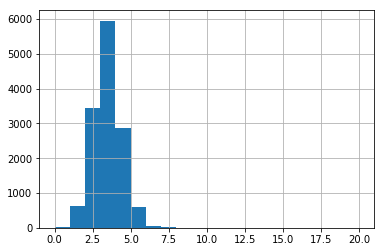

In [34]:
training_set.Bedroom2.hist(bins=20)

In [35]:
training_set.Bedroom2.fillna(value=training_set.Bedroom2.mean(), inplace=True)

# --------------------------------------------------------------------

In [36]:
training_set[training_set.Bathroom.isnull()].shape

(3468, 15)

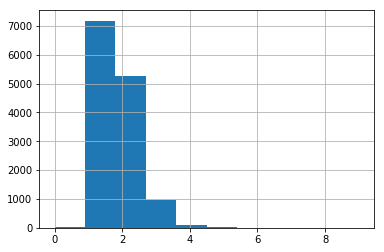

In [37]:
training_set.Bathroom.hist(bins=10)

In [38]:
training_set.Bathroom.mode()

0    1.0
dtype: float64

In [39]:
training_set.Bathroom.fillna(value=training_set.Bathroom.mode(), inplace=True)

# --------------------------------------------------------------------

In [40]:
training_set[training_set.Car.isnull()].shape

(3616, 15)

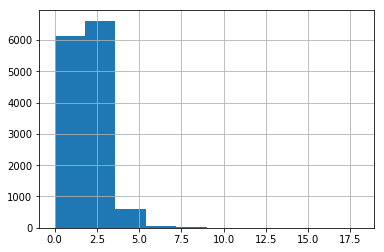

In [41]:
training_set.Car.hist(bins=10)

In [42]:
training_set.Car.fillna(value=training_set.Car.median(), inplace=True)

# --------------------------------------------------------------------

In [43]:
training_set[training_set.Landsize.isnull()].shape

(5166, 15)

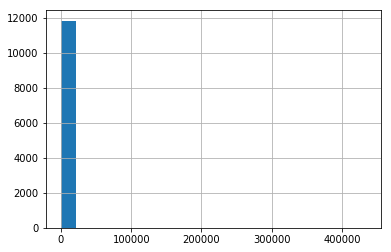

In [44]:
training_set.Landsize.hist(bins=20)

In [45]:
training_set.Landsize.describe()

count     11859.000000
mean        595.647188
std        4519.336354
min           0.000000
25%         192.000000
50%         466.000000
75%         656.000000
max      433014.000000
Name: Landsize, dtype: float64

In [46]:
training_set[training_set.Landsize == 0].shape

(1528, 15)

In [47]:
training_set[training_set.Landsize > 656].shape

(2819, 15)

In [48]:
training_set[training_set.Landsize < 219].shape

(3357, 15)

In [49]:
training_set[training_set.Landsize < 0].shape

(0, 15)

In [50]:
training_set[~training_set.Landsize.isnull() & training_set.Landsize > 0].shape

(10331, 15)

In [51]:
training_set["Landsize_log"] = np.log(training_set[~training_set.Landsize.isnull() & training_set.Landsize > 0]['Landsize'])

In [52]:
training_set["Landsize_log"].describe()

count    10331.000000
mean         6.096866
std          0.736103
min          0.000000
25%          5.638355
50%          6.291569
75%          6.522093
max         12.978525
Name: Landsize_log, dtype: float64

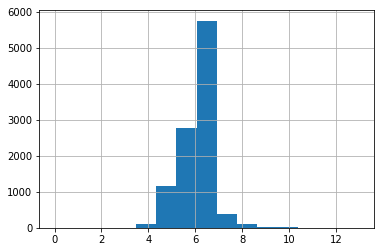

In [53]:
training_set["Landsize_log"].hist(bins=15)

In [54]:
Landsize_log_mean = training_set["Landsize_log"].mean()
training_set["Landsize_log"].fillna(value=Landsize_log_mean, inplace=True)
training_set["Landsize_log"] = training_set["Landsize_log"].apply(lambda x: Landsize_log_mean if x == 0 else x) 

In [55]:
training_set.drop('Landsize', axis=1, inplace=True)

# --------------------------------------------------------------------

In [56]:
training_set.fillna(value= training_set.mean()[["BuildingArea", "YearBuilt", "Propertycount"]], inplace=True)

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,Propertycount,sold_year,Landsize_log
17957,3.0,h,1370000.0,S,Gary,10.1,3163.0,3.000000,1.00000,2.0,148.560832,1966.468169,7822.0,2017,6.184149
6753,3.0,h,2956000.0,S,Marshall,4.1,3206.0,3.000000,2.00000,0.0,148.560832,1966.468169,2019.0,2017,5.703782
17054,3.0,h,1250000.0,VB,hockingstuart,12.3,3166.0,3.000000,1.00000,2.0,148.560832,1966.468169,3145.0,2017,6.401917
19340,2.0,u,682000.0,S,Jellis,7.7,3124.0,2.000000,1.00000,1.0,148.560832,1970.000000,8920.0,2017,7.008505
14883,3.0,h,740000.0,S,Ray,17.9,3192.0,2.973156,1.56244,2.0,148.560832,1966.468169,9758.0,2017,6.096866
21741,2.0,t,580000.0,PI,Jellis,5.2,3055.0,2.000000,1.00000,1.0,75.000000,2009.000000,7082.0,2017,6.096866
1472,4.0,h,1100000.0,S,Hodges,13.9,3165.0,4.000000,2.00000,1.0,190.000000,2004.000000,10969.0,2016,5.613128
18262,4.0,h,1200000.0,S,Nelson,12.0,3073.0,4.000000,2.00000,2.0,260.000000,1940.000000,21650.0,2017,6.212606
3559,2.0,h,1265000.0,S,Jellis,1.6,3066.0,3.000000,1.00000,1.0,112.000000,1920.000000,4553.0,2016,5.641907
25549,3.0,h,1840000.0,PI,Jellis,7.9,3103.0,2.973156,1.56244,2.0,148.560832,1966.468169,5682.0,2017,6.096866


# --------------------------------------------------------------------

In [57]:
training_set.isnull().any()

Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
BuildingArea     False
YearBuilt        False
Propertycount    False
sold_year        False
Landsize_log     False
dtype: bool

In [58]:
training_set.dtypes

Rooms            float64
Type              object
Price            float64
Method            object
SellerG           object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
BuildingArea     float64
YearBuilt        float64
Propertycount    float64
sold_year          int64
Landsize_log     float64
dtype: object

### Interested in knowing more about catagorical/text columns. Once after analysis we have to convert the data to numerical.
  * Before we convert catagorical data to numbers, we must see if there is any effect of the "individual catagories" on the mean of the target variable.
    * Example if there are 10 houses beloning to Method **"S"**, 100 houses belonging to Method **"SP"**.
    Total Price of "S" houses in 100000, Total Price of "SP" houses is 1000000. **The avarage (mean) Price of "S" and "SP" houses is same - 10000**. That means "statistically" **there is no direct effect of Method "S", "SP" on Price variable** (<font color='red'>note: in business point of view, there might be an effect. Need to check statistical understanding with business analyst</font>). In this scenario we should go with **One-Hot-Encoding or Dummy Variable** creation. Otherwise we can go with **Label Encoding**.

In [59]:
training_set.select_dtypes(['object']).columns

Index(['Type', 'Method', 'SellerG'], dtype='object')

In [60]:
training_set['Method'].value_counts()

S     11087
SP     2208
PI     2034
VB     1575
SA      121
Name: Method, dtype: int64

#### Is there a significant effect of different categories in Method on Price

In [61]:
training_set.groupby(['Method'])['Price'].mean()

Method
PI    1.111503e+06
S     1.063461e+06
SA    9.976520e+05
SP    8.772109e+05
VB    1.152664e+06
Name: Price, dtype: float64

Text(-21.325,0.5,'Mean Price')

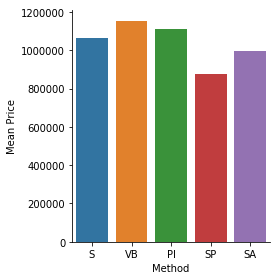

In [62]:
sns.factorplot(data=training_set, x="Method", y="Price", kind="bar", ci=None)
plt.ylabel("Mean Price")

#### Above visualization depects that there is a little difference in mean price for different catagories of Method. Need to do hypothesis testing to make sure that this holds true in population

#### ANOVA: Tukey's Honestly Singnificant Difference test

In [63]:
import statsmodels.stats.multicomp as multi

mc1 = multi.MultiComparison(training_set["Price"],training_set["Method"])
res1 = mc1.tukeyhsd()
print(res1.summary())

     Multiple Comparison of Means - Tukey HSD,FWER=0.05    
group1 group2   meandiff      lower        upper     reject
-----------------------------------------------------------
  PI     S    -48041.5099  -89770.8057   -6312.2141   True 
  PI     SA   -113850.6874 -275731.5702  48030.1953  False 
  PI     SP   -234291.7744 -287459.7849 -181123.7639  True 
  PI     VB    41161.4726  -16903.9744   99226.9196  False 
  S      SA   -65809.1776  -223935.5975  92317.2424  False 
  S      SP   -186250.2645 -226566.2889 -145934.2402  True 
  S      VB    89202.9825   42618.2144  135787.7506   True 
  SA     SP   -120441.087  -281963.4318  41081.2579  False 
  SA     VB    155012.16    -8187.7992  318212.1193  False 
  SP     VB    275453.247  218394.9976  332511.4964   True 
-----------------------------------------------------------


#### Most of the pair wise ANOVA tests show that there is a significance "Price" difference for different catagories of "Mehod". Hence we can do LavelEncoding

In [64]:
lst_all_method_cats = ['S', 'SP','PI','PN','SN','NB','VB','W','SA','SS','N/A']

In [65]:
training_set.Method = pd.Categorical(training_set.Method, categories=lst_all_method_cats)
training_set.Method.value_counts()

S      11087
SP      2208
PI      2034
VB      1575
SA       121
N/A        0
SS         0
W          0
NB         0
SN         0
PN         0
Name: Method, dtype: int64

In [66]:
training_set = pd.get_dummies(training_set, columns=["Method"], prefix=["Method"], drop_first=True)

In [67]:
[col for col in training_set.columns if 'Method' in col ]

['Method_SP',
 'Method_PI',
 'Method_PN',
 'Method_SN',
 'Method_NB',
 'Method_VB',
 'Method_W',
 'Method_SA',
 'Method_SS',
 'Method_N/A']

In [68]:
training_set[[col for col in training_set.columns if 'Method' in col]].head()

,Method_SP,Method_PI,Method_PN,Method_SN,Method_NB,Method_VB,Method_W,Method_SA,Method_SS,Method_N/A
17957,0,0,0,0,0,0,0,0,0,0
6753,0,0,0,0,0,0,0,0,0,0
17054,0,0,0,0,0,1,0,0,0,0
19340,0,0,0,0,0,0,0,0,0,0
14883,0,0,0,0,0,0,0,0,0,0


# --------------------------------------------------------------------

In [69]:
training_set['Type'].value_counts()

h    11307
u     3876
t     1842
Name: Type, dtype: int64

In [70]:
training_set.groupby(['Type'])['Price'].mean()

Type
h    1.221558e+06
t    9.230654e+05
u    6.222873e+05
Name: Price, dtype: float64

#### We see significant difference, hence we can go with Label Encoding

In [71]:
training_set['Type'] = pd.Categorical(training_set['Type'])
training_set['Type'] = training_set['Type'].cat.codes
training_set['Type'].value_counts()

0    11307
2     3876
1     1842
Name: Type, dtype: int64

# --------------------------------------------------------------------

In [72]:
training_set['SellerG'].value_counts().shape

(296,)

#### Check the behaviour of the top sellers.

In [73]:
top_sellers = list(training_set['SellerG'].value_counts()[training_set['SellerG'].value_counts().values > 100].index)

In [74]:
print(top_sellers)

['Nelson', 'Jellis', 'hockingstuart', 'Barry', 'Ray', 'Buxton', 'Marshall', 'Biggin', 'Brad', 'Fletchers', 'Woodards', 'McGrath', 'Jas', 'Greg', 'Sweeney', 'Noel', 'Stockdale', 'Miles', 'RT', 'YPA', 'Gary', 'Harcourts', 'Hodges', 'Raine', 'Love', 'Kay', 'RW', 'Village', 'Williams', 'HAR', 'Douglas']


In [75]:
top_sellers_train_set = training_set[training_set['SellerG'].isin(top_sellers)]

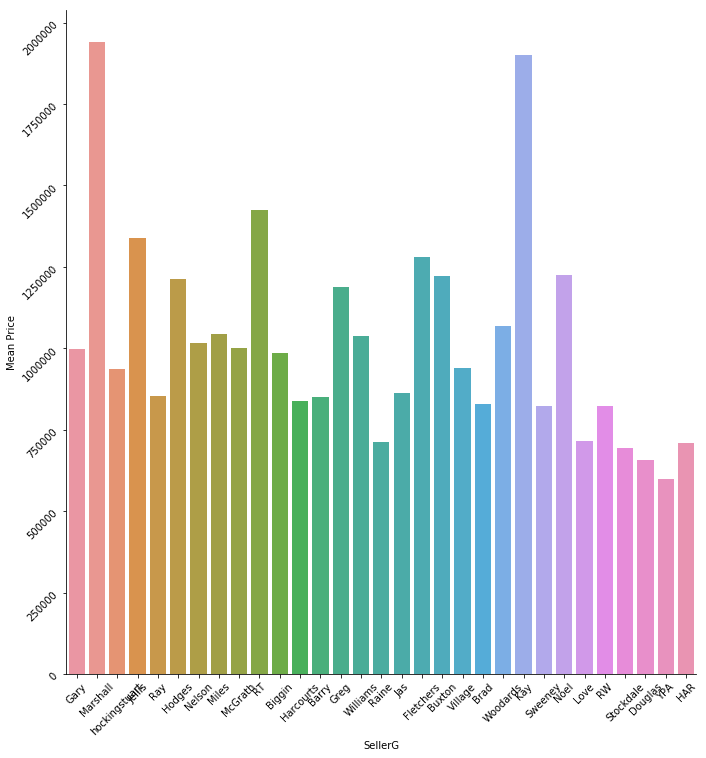

In [76]:
top_sel = sns.factorplot(data=top_sellers_train_set, x="SellerG", y="Price", kind="bar", size=10, ci=None)
plt.ylabel("Mean Price")
l1 = top_sel.set_yticklabels(rotation = 45)
l2 = top_sel.set_xticklabels(rotation = 45)

#### We see significant difference, hence we can go with Label Encoding

In [77]:
training_set['SellerG'] = pd.Categorical(training_set['SellerG'])
training_set['SellerG'] = training_set['SellerG'].cat.codes
training_set['SellerG'].value_counts().head()

177    1808
126    1615
285    1407
20     1370
220     951
Name: SellerG, dtype: int64

## Now data is ready, lets build a Linear Regression model with SGDRegressor

In [78]:
training_set.dtypes

Rooms            float64
Type                int8
Price            float64
SellerG            int16
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
BuildingArea     float64
YearBuilt        float64
Propertycount    float64
sold_year          int64
Landsize_log     float64
Method_SP          uint8
Method_PI          uint8
Method_PN          uint8
Method_SN          uint8
Method_NB          uint8
Method_VB          uint8
Method_W           uint8
Method_SA          uint8
Method_SS          uint8
Method_N/A         uint8
dtype: object

In [79]:
input_features = [x for x in training_set.columns if x not in ['Price']]

In [80]:
input_features

['Rooms',
 'Type',
 'SellerG',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'BuildingArea',
 'YearBuilt',
 'Propertycount',
 'sold_year',
 'Landsize_log',
 'Method_SP',
 'Method_PI',
 'Method_PN',
 'Method_SN',
 'Method_NB',
 'Method_VB',
 'Method_W',
 'Method_SA',
 'Method_SS',
 'Method_N/A']

In [81]:
X_train = training_set[input_features].values
y_train = training_set['Price'].values

In [82]:
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

In [83]:
y_train_pred = lr_model.predict(X_train)

In [84]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_train_pred)
print(r2)

0.501920202845


## Error analysis and finetuning the model

In [85]:
residuals = y_train - y_train_pred

In [86]:
def standard_scale(val):
    mean_vals = np.mean(val)
    std_vals = np.std(val)
    z_vals = [(x - mean_vals)/std_vals for x in val]
    return z_vals

In [87]:
def plotScatterPlot(residuals, y):
    std_residuals = standard_scale(residuals)
    std_predicted = standard_scale(y)
    plt.scatter(std_predicted, std_residuals, alpha = 0.6, color='y')
    l = plt.axhline(y=0, color='r')
    plt.xlabel('STD Predicted values')
    plt.ylabel('STD Residual values')
    plt.axis([-6, 6, -10, 10])
    plt.show()

### plotScatterPlot(residuals, y_train_pred)

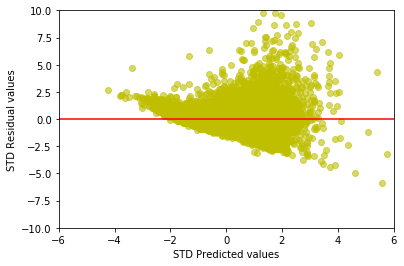

In [88]:
plotScatterPlot(residuals, y_train_pred)

#### We found heteroscedasticity in the dataset, one of the solution is the apply log transormation on y variable, build model. Let's try that.

In [89]:
type(y_train)

numpy.ndarray

In [90]:
y_train_log = np.log(y_train)

In [91]:
lr_model = lr_model.fit(X_train, y_train_log)

In [92]:
y_train_log_pred = lr_model.predict(X_train)

In [93]:
r2 = r2_score(y_train_log, y_train_log_pred)
print(r2)

0.599210937947


In [94]:
res = y_train_log - y_train_log_pred

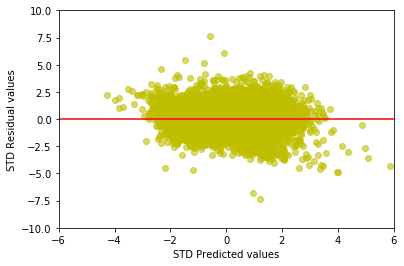

In [95]:
plotScatterPlot(res, y_train_log_pred)

In [96]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=300, learning_rate=0.1, random_state=42)
gbrt.fit(X_train, y_train)
y_pred_gbrt = gbrt.predict(X_train)

In [97]:
r2 = r2_score(y_train, y_pred_gbrt)
print(r2)

0.854009196538


## Apply model on TEST set and finetune model

#### Apply EDA outcome on TEST set

In [98]:
test_set = test_set.drop(test_set[test_set['Postcode'].isnull()].index)

test_set.drop(["Address", "CouncilArea", "Regionname", "Lattitude", "Suburb", "Longtitude"], axis=1, inplace=True)

test_set.Date = pd.to_datetime(test_set.Date)
test_set["sold_year"] = test_set.Date.apply(lambda x: x.year)
test_set.drop("Date", axis=1, inplace=True)

test_set.Bedroom2.fillna(value=test_set.Bedroom2.mean(), inplace=True)
test_set.Bathroom.fillna(value=test_set.Bathroom.mean(), inplace=True)
test_set.Car.fillna(value=test_set.Car.median(), inplace=True)

test_set["Landsize_log"] = np.log(test_set[~test_set.Landsize.isnull() & test_set.Landsize > 0]['Landsize'])
Landsize_log_mean = test_set["Landsize_log"].mean()
test_set["Landsize_log"].fillna(value=Landsize_log_mean, inplace=True)
test_set["Landsize_log"] = test_set["Landsize_log"].apply(lambda x: Landsize_log_mean if x == 0 else x) 
test_set.drop('Landsize', axis=1, inplace=True)

test_set.fillna(value= test_set.mean()[["BuildingArea", "YearBuilt", "Propertycount"]], inplace=True)

lst_all_method_cats = ['S', 'SP','PI','PN','SN','NB','VB','W','SA','SS','N/A']
test_set.Method = pd.Categorical(test_set.Method, categories=lst_all_method_cats)
test_set = pd.get_dummies(test_set, columns=["Method"], prefix=["Method"], drop_first=True)

test_set['Type'] = pd.Categorical(test_set['Type'])
test_set['Type'] = test_set['Type'].cat.codes

test_set['SellerG'] = pd.Categorical(test_set['SellerG'])
test_set['SellerG'] = test_set['SellerG'].cat.codes

In [99]:
input_features = [x for x in training_set.columns if x not in ['Price']]

X_test = test_set[input_features].values
y_test = test_set['Price'].values

In [100]:
y_test_pred_gbrt = gbrt.predict(X_test)

In [101]:
r2 = r2_score(y_test, y_test_pred_gbrt)
print(r2)

0.756062087303


In [102]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'max_depth':[4,5,6], 
     'n_estimators':[200,300], 
     'learning_rate':[0.2, 0.1, 0.05, 0.001]} ]
grd_gbr_model = GradientBoostingRegressor(random_state=15)
grid_search = GridSearchCV(grd_gbr_model, param_grid, cv=3,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=15,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [4, 5, 6], 'n_estimators': [200, 300], 'learning_rate': [0.2, 0.1, 0.05, 0.001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [103]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

In [104]:
best_y_pred_gbrt = grid_search.best_estimator_.predict(X_train)

In [105]:
r2 = r2_score(y_train, best_y_pred_gbrt)
print(r2)

0.890856305484


In [106]:
best_y_test_pred_gbrt = grid_search.best_estimator_.predict(X_test)

In [107]:
r2 = r2_score(y_test, best_y_test_pred_gbrt)
print(r2)

0.759531574627


### Use Log transformed Y - Variable to train

In [108]:
grd_gbr_model = GradientBoostingRegressor(random_state=15)
grid_search = GridSearchCV(grd_gbr_model, param_grid, cv=3,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train_log)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=15,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [4, 5, 6], 'n_estimators': [200, 300], 'learning_rate': [0.2, 0.1, 0.05, 0.001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [109]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

In [110]:
best_y_pred_gbrt_log = grid_search.best_estimator_.predict(X_train)

In [111]:
r2 = r2_score(y_train_log, best_y_pred_gbrt_log)
print(r2)

0.905398727048


In [112]:
y_test_log = np.log(y_test)

In [113]:
best_y_test_pred_gbrt_log = grid_search.best_estimator_.predict(X_test)

In [114]:
r2 = r2_score(y_test_log, best_y_test_pred_gbrt_log)
print(r2)

0.847307822713


## Play with model Hyper-parameters to fix overfitting

In [115]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt1 = GradientBoostingRegressor(max_depth=5, n_estimators=300, learning_rate=0.04, random_state=42)
gbrt1.fit(X_train, y_train_log)
y_pred_gbrt_log1 = gbrt1.predict(X_train)

In [116]:
r2 = r2_score(y_train_log, y_pred_gbrt_log1)
print(r2)

0.879656747706


In [117]:
y_test_pred_gbrt_log1 = gbrt1.predict(X_test)

In [118]:
r2 = r2_score(y_test_log, y_test_pred_gbrt_log1)
print(r2)

0.840413002552
